# HR ANALYTICS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [2]:
#importing dataset
df=pd.read_csv(r"D:\Download\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df=df.drop(["EmployeeCount","StandardHours","Over18"],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [9]:
# converting object into integers
le = LabelEncoder()
Label = ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]

for i in Label:
    df[i] = le.fit_transform(df[i])
    
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          2               1               1                        2  ...   
1          1               1               2                        3  ...   
2          2               4               4                        4  ...   
3          4               1               5                        4  ...   
4          1               3               7                        1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 32 columns]

In [10]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2               1               1                        2  ...   
1             1               1               2                        3  ...   
2             2               4               4                        4  ...   
3             4               1               5                        4  ...   
4             1               3               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2               3            2061                        3  ...   
1466          1               3            2062                        4  ...   
1467          3               1            2064                        2  ...   
1468          3               3            2065                        4  ...   
1469          3               3            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
X=df.drop(columns="Attrition")
Y=df["Attrition"]

In [13]:
#using select percentile for feature selection
Spercentile=SelectPercentile(score_func=chi2,percentile=80)
Spercentile=Spercentile.fit(X,Y)
cols=Spercentile.get_support(indices=True)
feature=X.columns[cols]
df_scores=pd.DataFrame({'Features':X.columns,'Chi2Score':Spercentile.scores_,'pvalues':Spercentile.pvalues_})
df_scores.sort_values(by='Chi2Score',ascending=False)
print(cols)
print(feature)

[ 0  2  3  4  7  8 11 12 13 14 15 16 17 18 19 22 23 24 25 26 27 28 29 30]
Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [14]:
df=df.drop(["BusinessTravel","Education","EducationField","Gender","HourlyRate","PercentSalaryHike","PerformanceRating"],axis=1)

In [15]:
df

Age  Attrition  DailyRate  Department  DistanceFromHome  EmployeeNumber  \
0      41          1       1102           2                 1               1   
1      49          0        279           1                 8               2   
2      37          1       1373           1                 2               4   
3      33          0       1392           1                 3               5   
4      27          0        591           1                 2               7   
...   ...        ...        ...         ...               ...             ...   
1465   36          0        884           1                23            2061   
1466   39          0        613           1                 6            2062   
1467   27          0        155           1                 4            2064   
1468   49          0       1023           2                 2            2065   
1469   34          0        628           1                 8            2068   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobRole  ...  \
0                           2               3         2        7  ...   
1                           3               2         2        6  ...   
2                           4               2         1        2  ...   
3                           4               3         1        6  ...   
4                           1               3         1        2  ...   
...                       ...             ...       ...      ...  ...   
1465                        3               4         2        2  ...   
1466                        4               2         3        0  ...   
1467                        2               4         2        4  ...   
1468                        4               2         2        7  ...   
1469                        2               4         2        2  ...   

      OverTime  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0            1                         1                 0                  8   
1            0                         4                 1                 10   
2            1                         2                 0                  7   
3            1                         3                 0                  8   
4            0                         4                 1                  6   
...        ...                       ...               ...                ...   
1465         0                         3                 1                 17   
1466         0                         1                 1                  9   
1467         1                         2                 1                  6   
1468         0                         4                 0                 17   
1469         0                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4                         3                3               2   
...                     ...              ...             ...   
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                      4                        0                     5  
1                      7                        1                     7  
2                      0                        0                     0  
3                      7                        3                     0  
4                      2                    

In [16]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Pair Plot

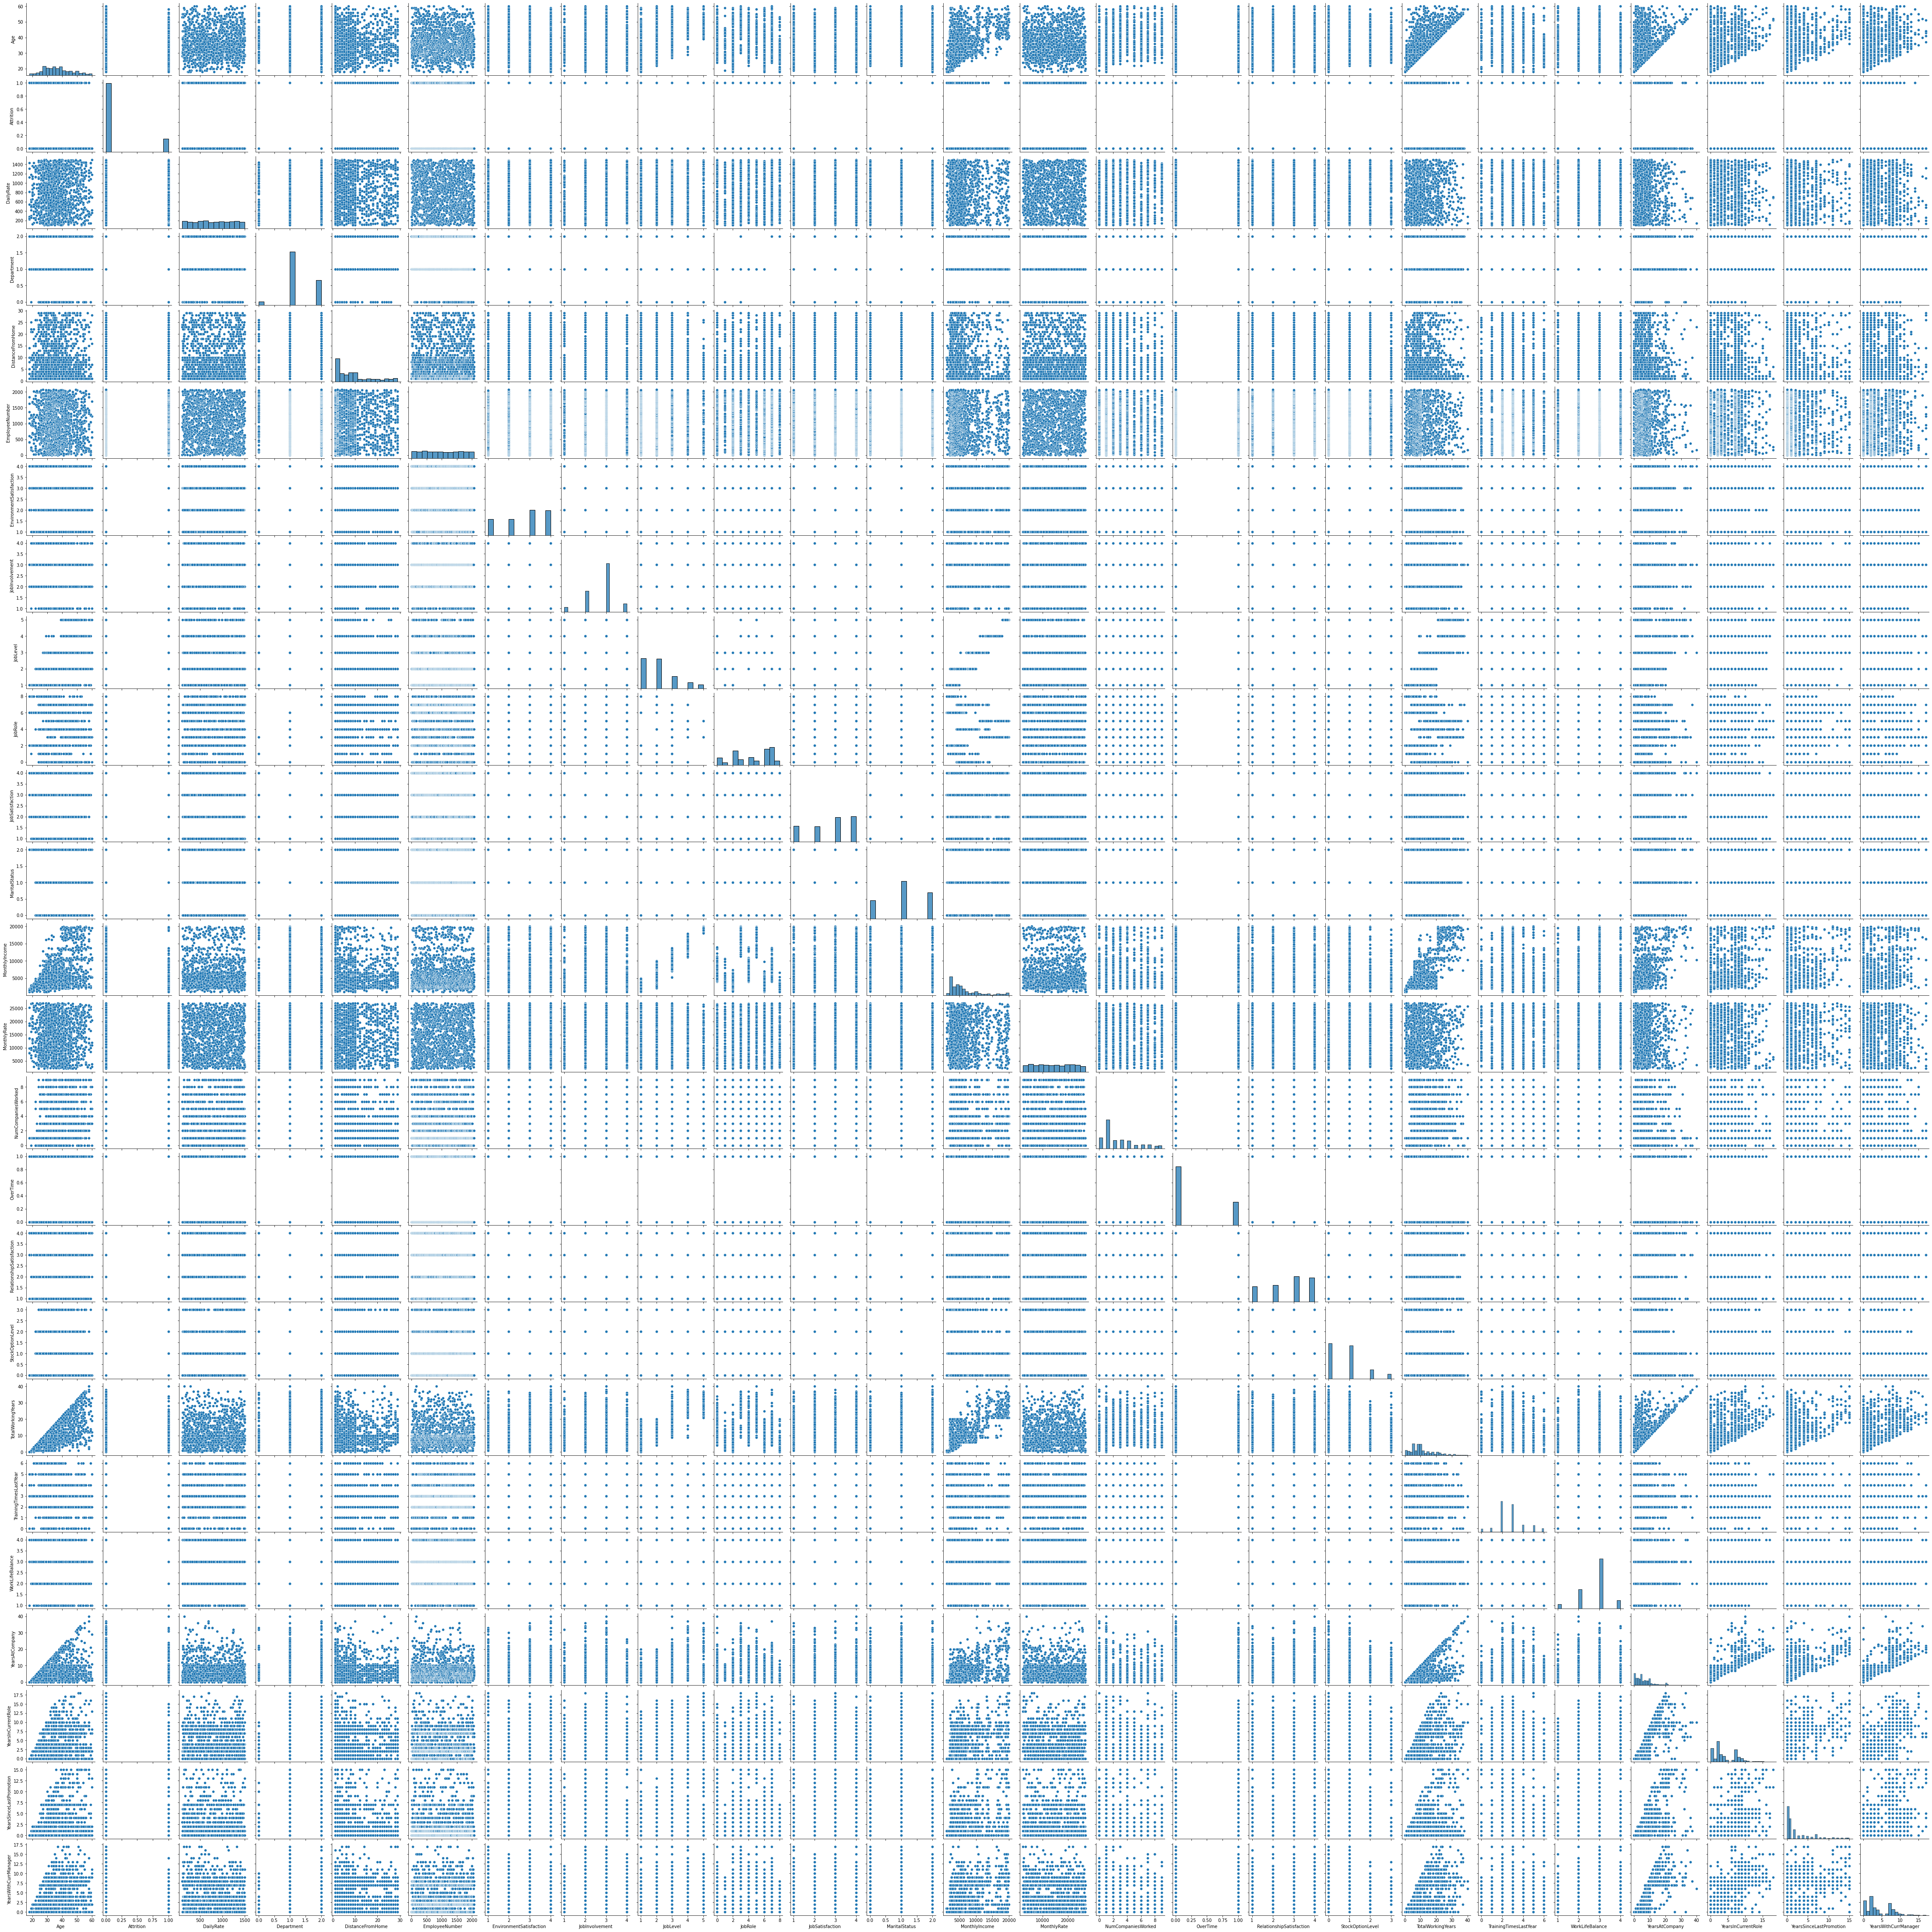

In [17]:
sns.pairplot(df)

## Box plot

Age                            AxesSubplot(0.125,0.749828;0.133621x0.130172)
DailyRate                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Department                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
DistanceFromHome            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
EmployeeNumber              AxesSubplot(0.766379,0.749828;0.133621x0.130172)
EnvironmentSatisfaction        AxesSubplot(0.125,0.593621;0.133621x0.130172)
JobInvolvement              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
JobLevel                     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
JobRole                     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
JobSatisfaction             AxesSubplot(0.766379,0.593621;0.133621x0.130172)
MaritalStatus                  AxesSubplot(0.125,0.437414;0.133621x0.130172)
MonthlyIncome               AxesSubplot(0.285345,0.437414;0.133621x0.130172)
MonthlyRate                  AxesSubplot(0.44569,0.437414;0.133621x0.130172)

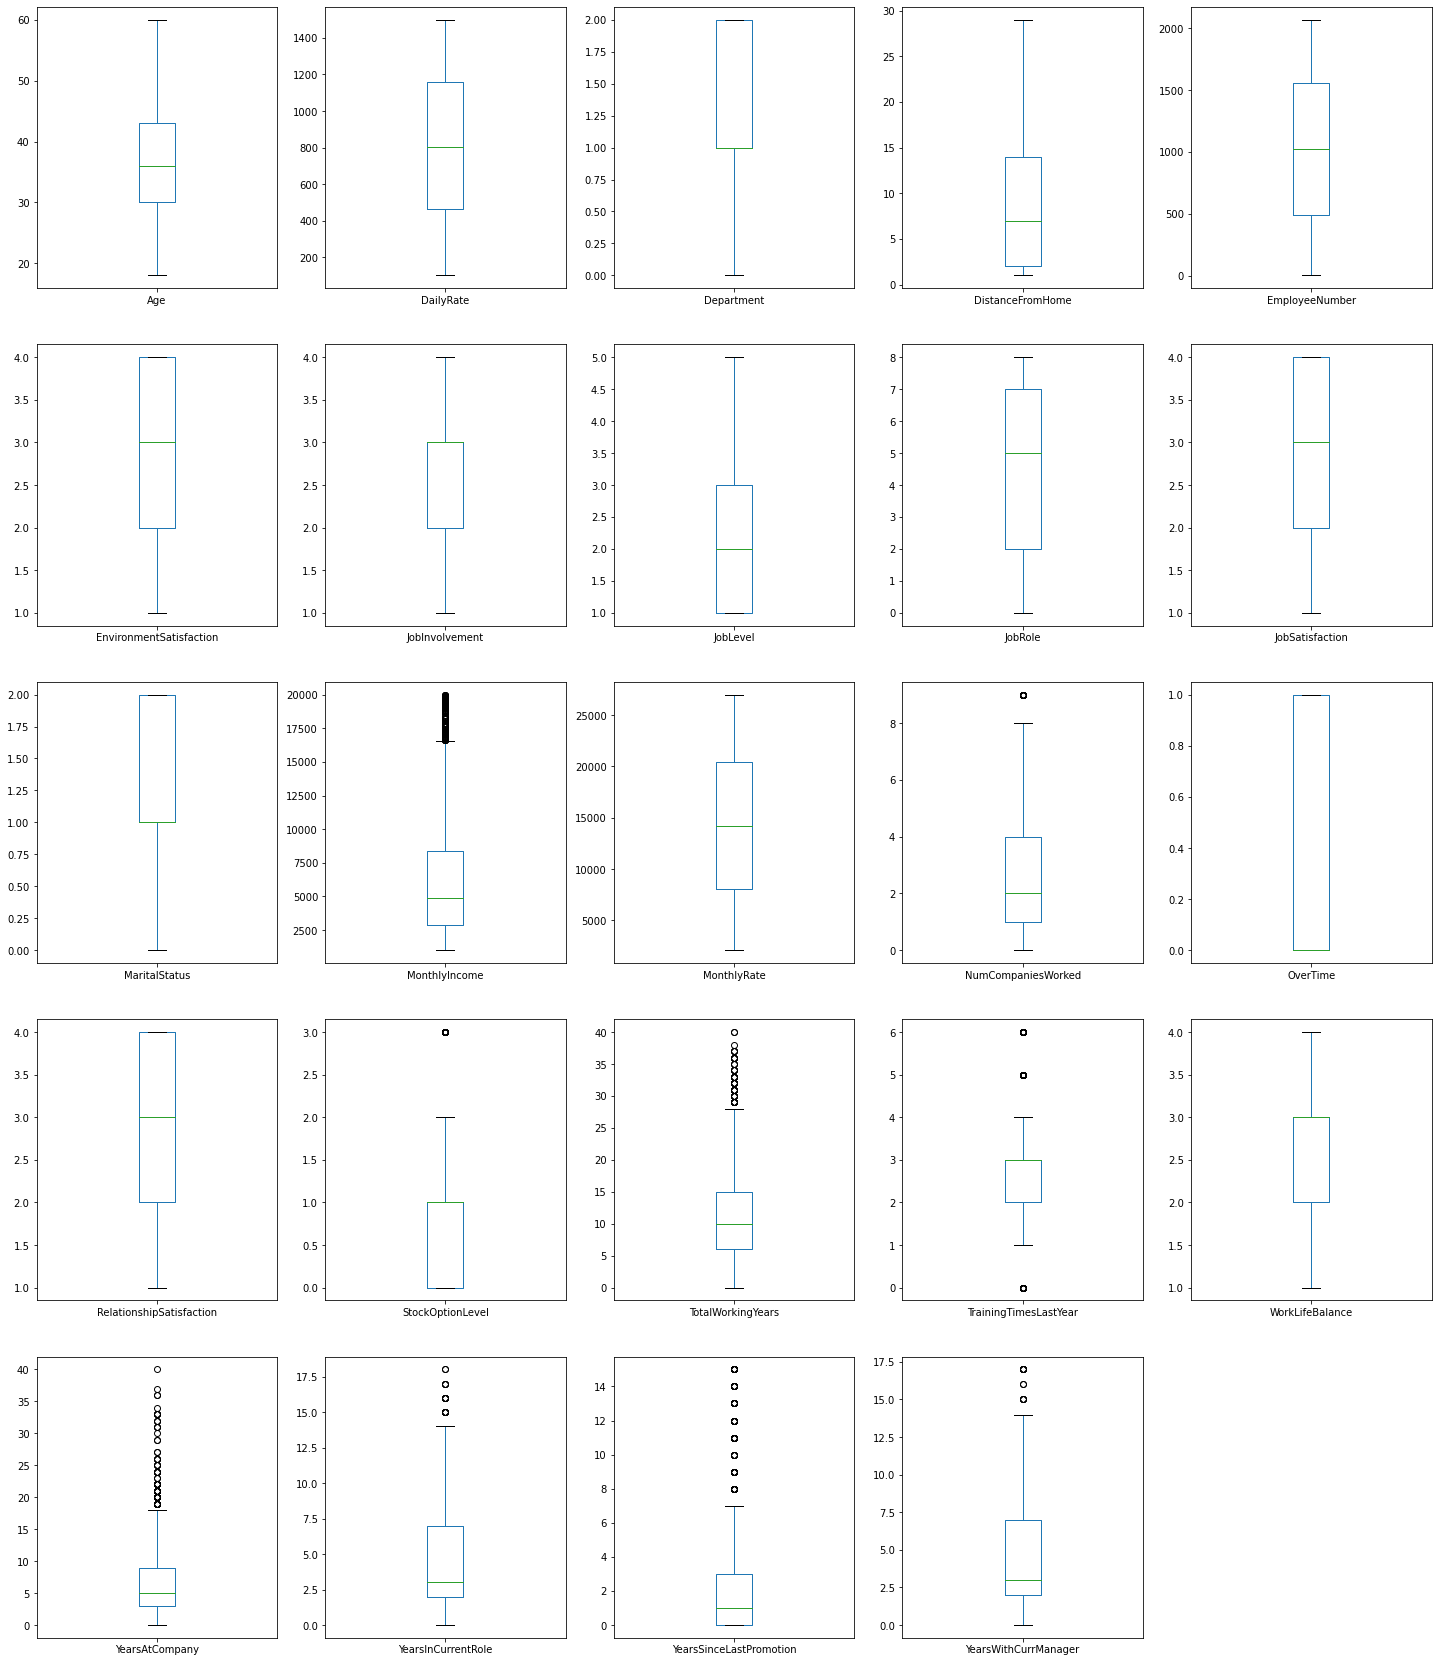

In [18]:
df.drop(["Attrition"],axis=1).plot(kind='box',subplots=True,layout=(5,5),figsize=(25,30))

In [19]:
df

Age  Attrition  DailyRate  Department  DistanceFromHome  EmployeeNumber  \
0      41          1       1102           2                 1               1   
1      49          0        279           1                 8               2   
2      37          1       1373           1                 2               4   
3      33          0       1392           1                 3               5   
4      27          0        591           1                 2               7   
...   ...        ...        ...         ...               ...             ...   
1465   36          0        884           1                23            2061   
1466   39          0        613           1                 6            2062   
1467   27          0        155           1                 4            2064   
1468   49          0       1023           2                 2            2065   
1469   34          0        628           1                 8            2068   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobRole  ...  \
0                           2               3         2        7  ...   
1                           3               2         2        6  ...   
2                           4               2         1        2  ...   
3                           4               3         1        6  ...   
4                           1               3         1        2  ...   
...                       ...             ...       ...      ...  ...   
1465                        3               4         2        2  ...   
1466                        4               2         3        0  ...   
1467                        2               4         2        4  ...   
1468                        4               2         2        7  ...   
1469                        2               4         2        2  ...   

      OverTime  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0            1                         1                 0                  8   
1            0                         4                 1                 10   
2            1                         2                 0                  7   
3            1                         3                 0                  8   
4            0                         4                 1                  6   
...        ...                       ...               ...                ...   
1465         0                         3                 1                 17   
1466         0                         1                 1                  9   
1467         1                         2                 1                  6   
1468         0                         4                 0                 17   
1469         0                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4                         3                3               2   
...                     ...              ...             ...   
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                      4                        0                     5  
1                      7                        1                     7  
2                      0                        0                     0  
3                      7                        3                     0  
4                      2                    

## Scatter plot

In [20]:
X=df.drop(["Attrition"],axis=1)
Y=df.Attrition

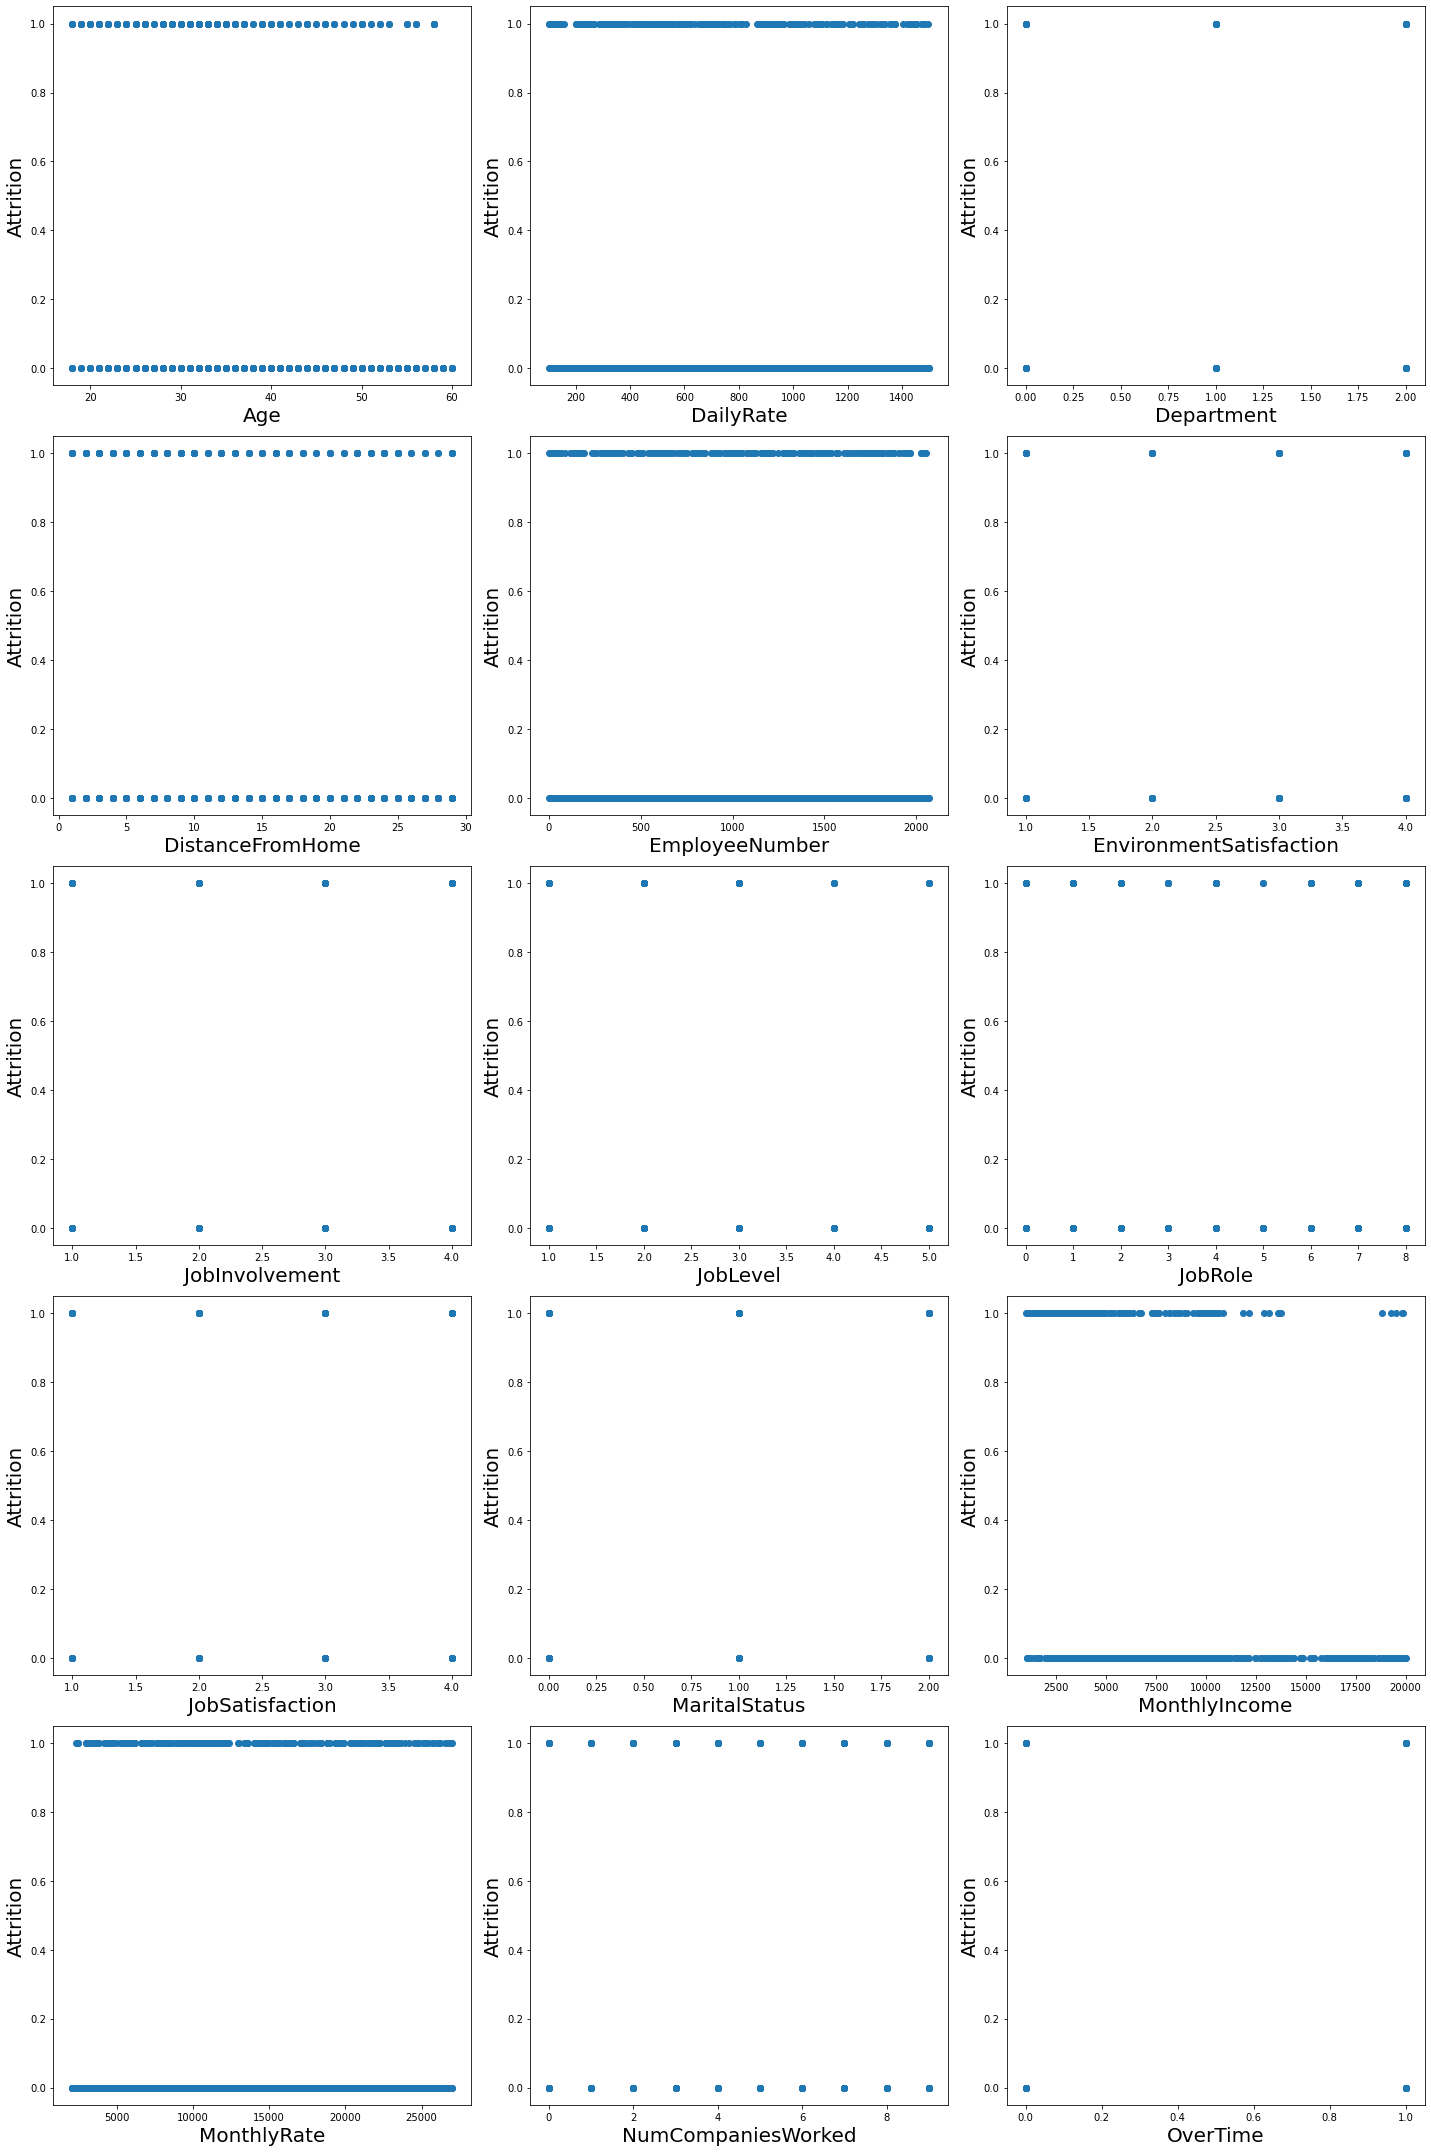

In [22]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    pltnumber+=1
plt.tight_layout()

## Dist plot

0.41286446154785084
1.842483584049465
-0.003514976958291024
0.17205501555446084
0.9571400469829039
0.01655710251921753
-0.3213261358382832
-0.4979106286269671
1.0243546583925869
-0.3569052550383217
-0.3293354633089524
-0.15201929651271306
1.3684185123330814
0.01855884556846042
1.0254233954371303
0.963504412638946
-0.3025184698222079
0.9679912809556104
1.11603155825941
0.5525595985771926
-0.5519163838185224
1.7627284034822992
0.9164268059808774
1.982264623462895
0.8326002906209379


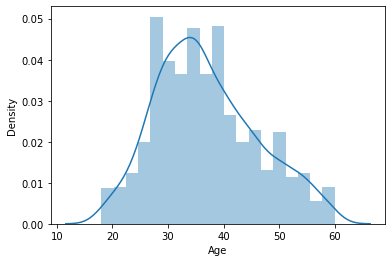

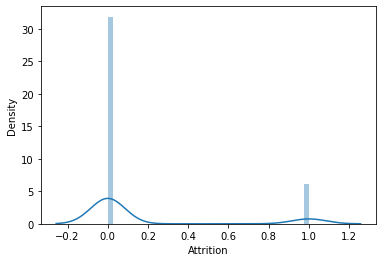

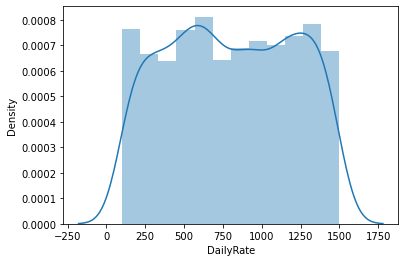

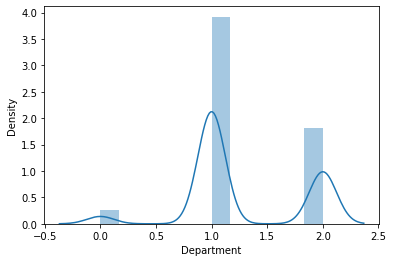

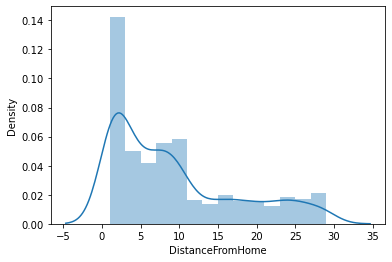

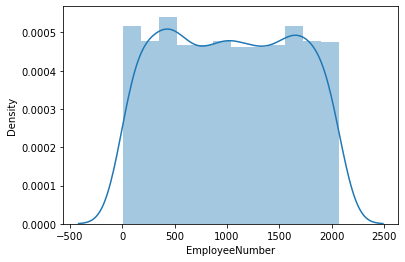

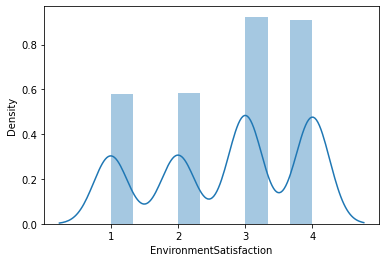

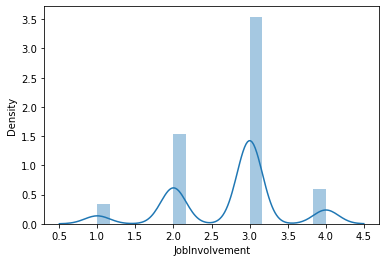

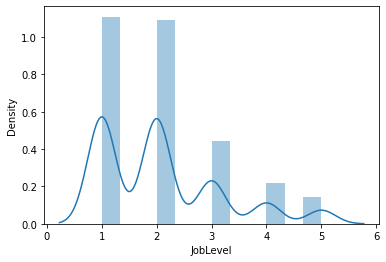

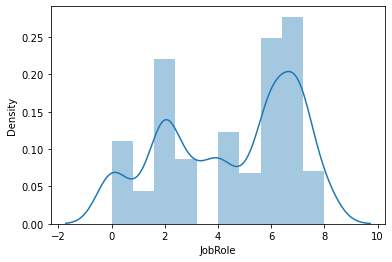

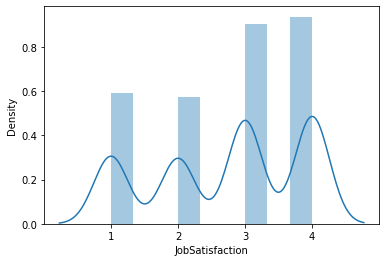

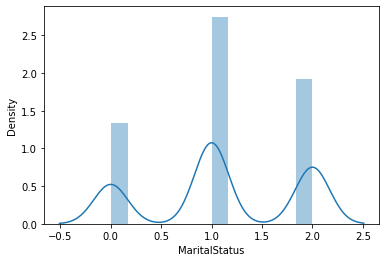

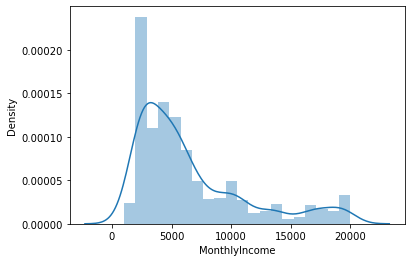

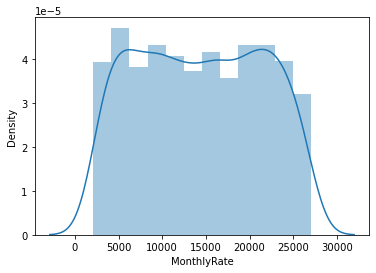

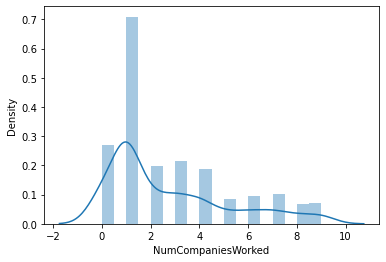

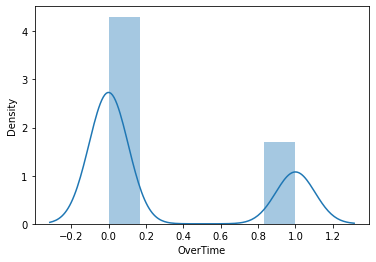

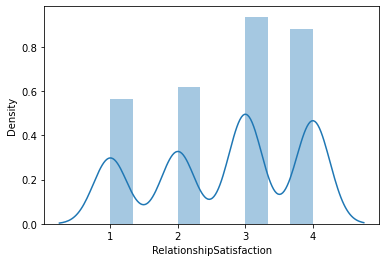

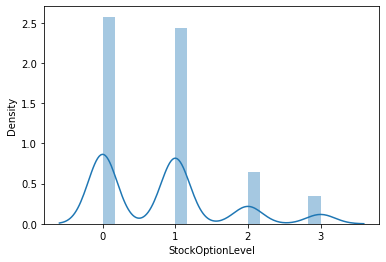

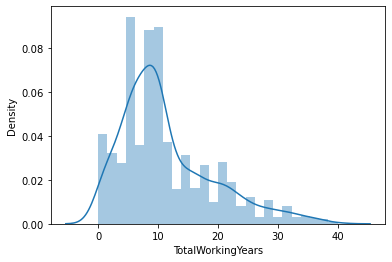

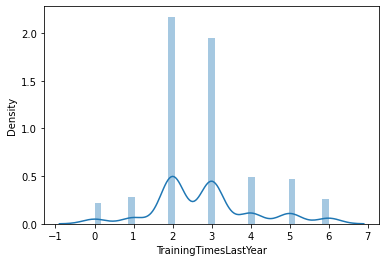

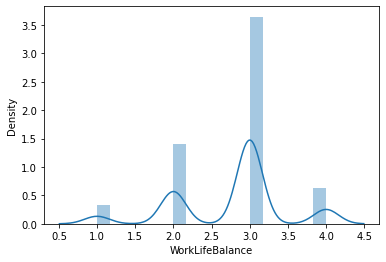

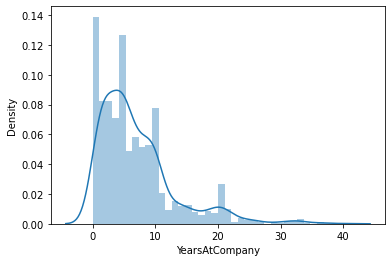

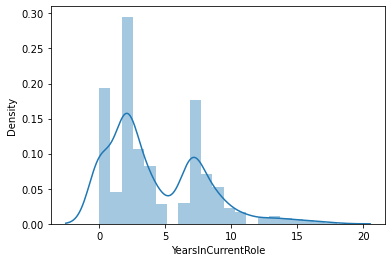

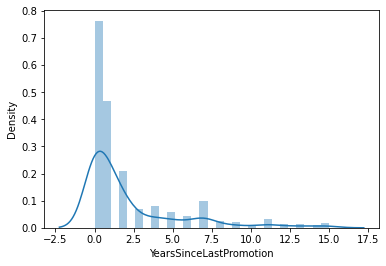

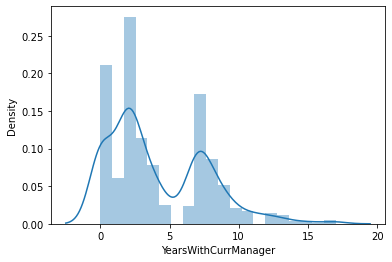

In [23]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [24]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [25]:
df["MonthlyIncome"]=np.cbrt(df["MonthlyIncome"])
df["YearsAtCompany"]=np.cbrt(df["YearsAtCompany"])
df["YearsSinceLastPromotion"]=np.cbrt(df["YearsSinceLastPromotion"])
df["TotalWorkingYears"]=np.cbrt(df["TotalWorkingYears"])
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.198634
YearsWithCurrManager        0.833451
dtype: float64

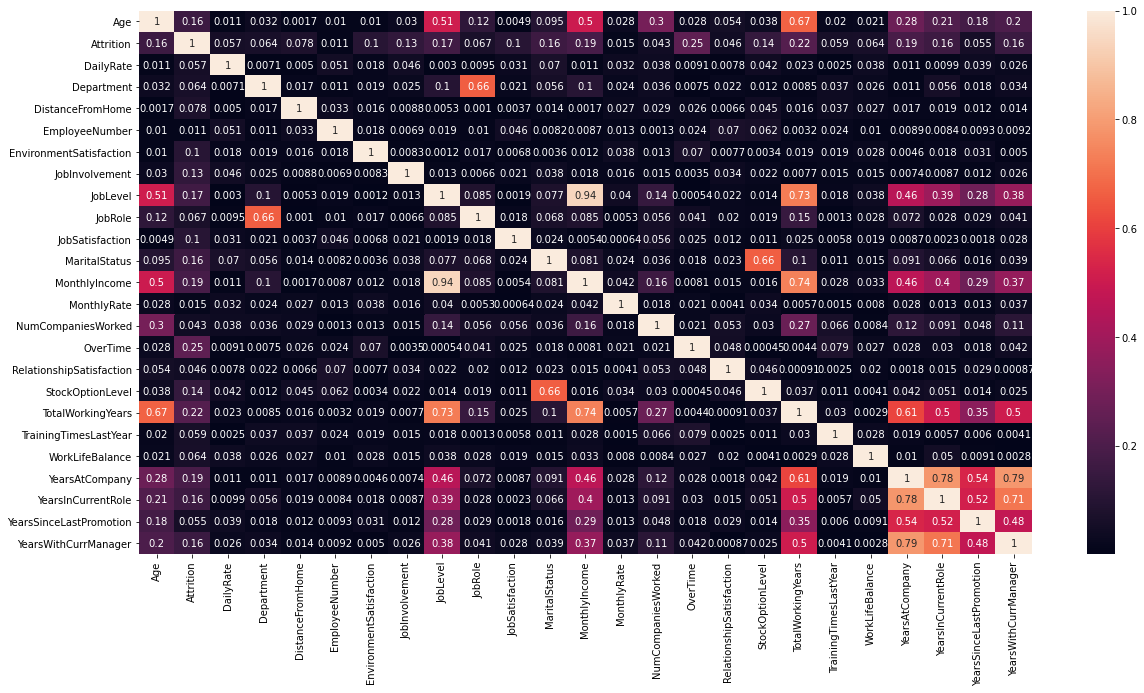

In [26]:
df_corr=df.corr().abs()
df_corr
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)
plt.show()

# USING KNN 


In [27]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [29]:
X=df.drop(["Attrition"],axis=1)
Y=df.Attrition

In [30]:
scaler=StandardScaler()

In [31]:
X_scaled=scaler.fit_transform(X)

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [33]:
knn=KNeighborsClassifier()

In [34]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
Y_pred=knn.predict(X_test)

In [36]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[307,   4],
       [ 50,   7]], dtype=int64)

In [37]:
accuracy=accuracy_score(Y_test,Y_pred)

In [38]:
accuracy

0.8532608695652174

In [39]:
auc=roc_auc_score(Y_test,Y_pred)

In [40]:
auc

0.5549726406047272

In [41]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

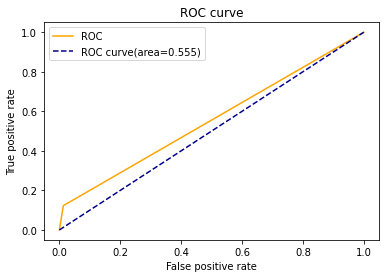

In [42]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.64      0.12      0.21        57

    accuracy                           0.85       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.83      0.85      0.81       368



# USING KNN WITH HYPERPARAMETER TUNING

In [44]:
scaler=StandardScaler()

In [45]:
X_scaled=scaler.fit_transform(X)

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [47]:
knn=KNeighborsClassifier()

In [48]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [52]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [53]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [54]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [55]:
accuracy=accuracy_score(Y_test,Y_pred)

In [56]:
accuracy

0.8559782608695652

In [57]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[309,   2],
       [ 51,   6]], dtype=int64)

In [58]:
auc=roc_auc_score(Y_test,Y_pred)

In [59]:
auc

0.549416144863767

In [60]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

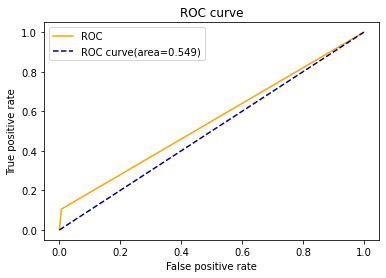

In [61]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.75      0.11      0.18        57

    accuracy                           0.86       368
   macro avg       0.80      0.55      0.55       368
weighted avg       0.84      0.86      0.81       368



# MODELLING WITH RANDOM FOREST


In [64]:
X=df.drop(["Attrition"],axis=1)
Y=df.Attrition

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[306   5]
 [ 45  12]]
0.8641304347826086
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       311
           1       0.71      0.21      0.32        57

    accuracy                           0.86       368
   macro avg       0.79      0.60      0.62       368
weighted avg       0.85      0.86      0.83       368



# RANDOM FOREST WITH HYPERPARAMETER (RANDOM AND GRID)

In [68]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [69]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [70]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'entropy'}

In [71]:
best_random_grid=rf_randomcv.best_estimator_

In [72]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_leaf=2, n_estimators=200)

In [73]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[309   2]
 [ 46  11]]
Accuracy Score 0.8695652173913043
Classification report:               precision    recall  f1-score   support

           0       0.87      0.99      0.93       311
           1       0.85      0.19      0.31        57

    accuracy                           0.87       368
   macro avg       0.86      0.59      0.62       368
weighted avg       0.87      0.87      0.83       368



# GRID SEARCH CV

In [74]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'entropy'}

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [0, 100, 200, 300, 400]}


In [76]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [340],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [77]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_leaf=4, min_samples_split=3)

In [78]:
best_grid=grid_search.best_estimator_

In [79]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_leaf=4, min_samples_split=3)

In [80]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[309   2]
 [ 50   7]]
Accuracy Score 0.8586956521739131
Classification report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.78      0.12      0.21        57

    accuracy                           0.86       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.85      0.86      0.81       368



In [81]:
accuracy=accuracy_score(Y_test,Y_pred)

In [82]:
accuracy

0.8586956521739131

In [83]:
auc=roc_auc_score(Y_test,Y_pred)

In [84]:
auc

0.5581880746883285

In [85]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

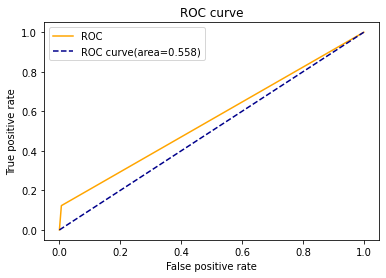

In [86]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# DECISION TREE


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
X=df.drop(["Attrition"],axis=1)
Y=df.Attrition

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [90]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [91]:
Y_pred=dt.predict(X_test)


In [92]:
accuracy=accuracy_score(Y_test,Y_pred)

In [93]:
accuracy

0.7961956521739131

In [94]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[266,  45],
       [ 30,  27]], dtype=int64)

In [95]:
auc=roc_auc_score(Y_test,Y_pred)

In [96]:
auc

0.6644948383821289

In [97]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

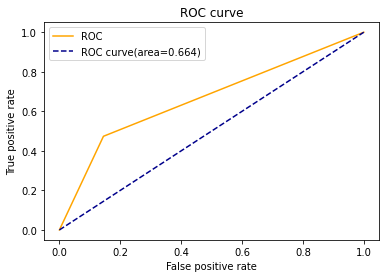

In [98]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [99]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       311
           1       0.38      0.47      0.42        57

    accuracy                           0.80       368
   macro avg       0.64      0.66      0.65       368
weighted avg       0.82      0.80      0.81       368



# DECISIONTREE WITH HYPER PARAMETER

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [101]:
dt=DecisionTreeClassifier()


In [102]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['entropy','gini']}


In [103]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [104]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [105]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [106]:
Y_pred=clf.predict(X_test)


In [114]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[304,   7],
       [ 52,   5]], dtype=int64)

In [107]:
accuracy=accuracy_score(Y_test,Y_pred)

In [108]:
accuracy

0.8396739130434783

In [109]:
auc=roc_auc_score(Y_test,Y_pred)

In [110]:
auc

0.5326056298302025

In [111]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

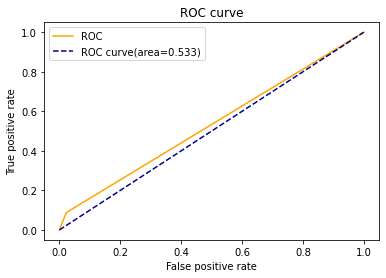

In [112]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [113]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       311
           1       0.42      0.09      0.14        57

    accuracy                           0.84       368
   macro avg       0.64      0.53      0.53       368
weighted avg       0.79      0.84      0.79       368



# GRADIENT BOOSTING

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
X=df.drop(["Attrition"],axis=1)
Y=df.Attrition

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [118]:
gbdt=GradientBoostingClassifier()

In [119]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [120]:
Y_pred=gbdt.predict(X_test)


In [121]:
accuracy=accuracy_score(Y_test,Y_pred)

In [122]:
accuracy

0.8722826086956522

In [123]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[301,  10],
       [ 37,  20]], dtype=int64)

In [124]:
auc=roc_auc_score(Y_test,Y_pred)

In [125]:
auc

0.6593614260732216

In [126]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

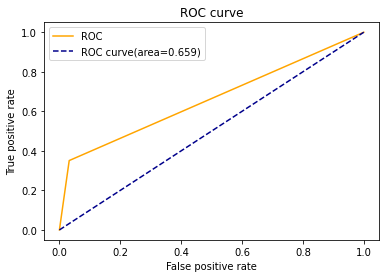

In [127]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [128]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       311
           1       0.67      0.35      0.46        57

    accuracy                           0.87       368
   macro avg       0.78      0.66      0.69       368
weighted avg       0.86      0.87      0.86       368



# GBDT WITH HYPER PARAMETER

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [131]:
gbdt=GradientBoostingClassifier()

In [132]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [133]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1)

In [134]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [136]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [137]:
Y_pred=clf.predict(X_test)


In [138]:
accuracy=accuracy_score(Y_test,Y_pred)

In [139]:
accuracy

0.875

In [140]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[303,   8],
       [ 38,  19]], dtype=int64)

In [141]:
auc=roc_auc_score(Y_test,Y_pred)

In [142]:
auc

0.6538049303322615

In [143]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

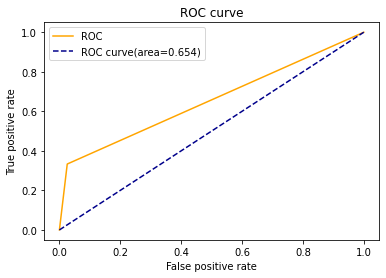

In [144]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [145]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       311
           1       0.70      0.33      0.45        57

    accuracy                           0.88       368
   macro avg       0.80      0.65      0.69       368
weighted avg       0.86      0.88      0.86       368



In [146]:
md=[knn,rf,dt,gbdt]
import pickle
filename="Titanic.pkl"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
1. Conducted 4 models on Avacado Project dataset namely KNN, Random Forest, Desicion Tree and Gradient Boosting with Hyperparameter tuning
2. It comes to a conclusion that Gradient Boosting model is providing best score for Avacado Project dataset
3. r2_score=0.875